# Problem 3 - SSD, ONNX model, Visualization, Inferencing

Sources:
  - https://github.com/qfgaohao/pytorch-ssd
  - https://pytorch.org/tutorials/advanced/super_resolution_with_onnxruntime.html
  - https://github.com/onnx/tutorials/blob/master/tutorials/OnnxRuntimeServerSSDModel.ipynb

## 3.1

Copy the GitHub Repo: https://github.com/qfgaohao/pytorch-ssd

In [1]:
!git clone https://github.com/qfgaohao/pytorch-ssd.git

Cloning into 'pytorch-ssd'...
remote: Enumerating objects: 819, done.
remote: Counting objects: 100% (5/5), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 819 (delta 0), reused 2 (delta 0), pack-reused 814
Receiving objects: 100% (819/819), 1.06 MiB | 7.21 MiB/s, done.
Resolving deltas: 100% (546/546), done.


In [2]:
%cd pytorch-ssd

/content/pytorch-ssd


Get models and Pascal VOC 2007 dataset:

In [3]:
# label
!wget -O models/voc-model-labels.txt "https://drive.google.com/uc?export=download&id=1q1sXhKIxniInw3WASnEDKYMqPMuiDDvc"

# !wget -P models https://storage.googleapis.com/models-hao/voc-model-labels.txt

--2023-12-17 01:01:58--  https://drive.google.com/uc?export=download&id=1q1sXhKIxniInw3WASnEDKYMqPMuiDDvc
Resolving drive.google.com (drive.google.com)... 74.125.202.101, 74.125.202.102, 74.125.202.113, ...
Connecting to drive.google.com (drive.google.com)|74.125.202.101|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-04-cc-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/8jh3gusghrogbl7cu5q19h166n6u5dui/1702774875000/13772258371783161864/*/1q1sXhKIxniInw3WASnEDKYMqPMuiDDvc?e=download&uuid=be37f277-ba7a-4dd5-a79f-459f2bd5f59d [following]
--2023-12-17 01:01:58--  https://doc-04-cc-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/8jh3gusghrogbl7cu5q19h166n6u5dui/1702774875000/13772258371783161864/*/1q1sXhKIxniInw3WASnEDKYMqPMuiDDvc?e=download&uuid=be37f277-ba7a-4dd5-a79f-459f2bd5f59d
Resolving doc-04-cc-docs.googleusercontent.com (doc-04-cc-docs.googleusercontent.com)... 74.125.126.132, 2607:

The rest of the models were imported manually from: https://drive.google.com/drive/folders/1pKn-RifvJGWiOx0ZCRLtCXM5GT5lAluu

In [4]:
# data
!wget -P data http://host.robots.ox.ac.uk/pascal/VOC/voc2007/VOCtest_06-Nov-2007.tar

--2023-12-17 01:02:05--  http://host.robots.ox.ac.uk/pascal/VOC/voc2007/VOCtest_06-Nov-2007.tar
Resolving host.robots.ox.ac.uk (host.robots.ox.ac.uk)... 129.67.94.152
Connecting to host.robots.ox.ac.uk (host.robots.ox.ac.uk)|129.67.94.152|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 451020800 (430M) [application/x-tar]
Saving to: ‘data/VOCtest_06-Nov-2007.tar’

VOCtest_06-Nov-2007 100%[===================>] 430.13M  28.8MB/s    in 16s     

2023-12-17 01:02:22 (26.9 MB/s) - ‘data/VOCtest_06-Nov-2007.tar’ saved [451020800/451020800]



In [5]:
!tar -xvf data/VOCtest_06-Nov-2007.tar -C data/ #/root/

Streaming output truncated to the last 5000 lines.
VOCdevkit/VOC2007/JPEGImages/000725.jpg
VOCdevkit/VOC2007/JPEGImages/000727.jpg
VOCdevkit/VOC2007/JPEGImages/000732.jpg
VOCdevkit/VOC2007/JPEGImages/000734.jpg
VOCdevkit/VOC2007/JPEGImages/000735.jpg
VOCdevkit/VOC2007/JPEGImages/000736.jpg
VOCdevkit/VOC2007/JPEGImages/000737.jpg
VOCdevkit/VOC2007/JPEGImages/000741.jpg
VOCdevkit/VOC2007/JPEGImages/000743.jpg
VOCdevkit/VOC2007/JPEGImages/000744.jpg
VOCdevkit/VOC2007/JPEGImages/000745.jpg
VOCdevkit/VOC2007/JPEGImages/000747.jpg
VOCdevkit/VOC2007/JPEGImages/000749.jpg
VOCdevkit/VOC2007/JPEGImages/000751.jpg
VOCdevkit/VOC2007/JPEGImages/000757.jpg
VOCdevkit/VOC2007/JPEGImages/000758.jpg
VOCdevkit/VOC2007/JPEGImages/000759.jpg
VOCdevkit/VOC2007/JPEGImages/000762.jpg
VOCdevkit/VOC2007/JPEGImages/000765.jpg
VOCdevkit/VOC2007/JPEGImages/000766.jpg
VOCdevkit/VOC2007/JPEGImages/000769.jpg
VOCdevkit/VOC2007/JPEGImages/000773.jpg
VOCdevkit/VOC2007/JPEGImages/000775.jpg
VOCdevkit/VOC2007/JPEGImages/

Evaluation and test accuracy for the 20 classes:

In [6]:
!pwd

/content/pytorch-ssd


In [ ]:
!python eval_ssd.py --net mb1-ssd  --dataset /content/pytorch-ssd/data/VOCdevkit/VOC2007 --trained_model models/mobilenet-v1-ssd-mp-0_675.pth --label_file models/voc-model-labels.txt

Streaming output truncated to the last 5000 lines.
Load Image: 0.003023 seconds.
Inference time:  0.0055925846099853516
Prediction: 0.011145 seconds.
process image 3709
Load Image: 0.003487 seconds.
Inference time:  0.004714488983154297
Prediction: 0.051930 seconds.
process image 3710
Load Image: 0.003391 seconds.
Inference time:  0.004940509796142578
Prediction: 0.027916 seconds.
process image 3711
Load Image: 0.003446 seconds.
Inference time:  0.009820938110351562
Prediction: 0.049964 seconds.
process image 3712
Load Image: 0.002974 seconds.
Inference time:  0.004928112030029297
Prediction: 0.028820 seconds.
process image 3713
Load Image: 0.002830 seconds.
Inference time:  0.0047397613525390625
Prediction: 0.016809 seconds.
process image 3714
Load Image: 0.003431 seconds.
Inference time:  0.004940032958984375
Prediction: 0.024677 seconds.
process image 3715
Load Image: 0.001609 seconds.
Inference time:  0.004789590835571289
Prediction: 0.022564 seconds.
process image 3716
Load Image:

**Answer:**

Above we can see that the accuracy of the pretrained model is about 0.68 which can be considered pretty low for image/object recognition tasks. We will proceed to fine tune this model on our data.

## 3.2

In [ ]:
!pip install boto3

Let's get the Handgun and Shotgun data:

In [8]:
#data
!python open_images_downloader.py --root ./data/open_images --class_names "Handgun,Shotgun" --num_workers 20

2023-12-17 01:03:43,599 - root - Download https://storage.googleapis.com/openimages/2018_04/class-descriptions-boxable.csv.
2023-12-17 01:03:43,689 - root - Download https://storage.googleapis.com/openimages/2018_04/train/train-annotations-bbox.csv.
2023-12-17 01:03:53,633 - root - Read annotation file ./data/open_images/train-annotations-bbox.csv
2023-12-17 01:04:19,957 - root - train bounding boxes size: 1307
2023-12-17 01:04:19,957 - root - Approximate Image Stats: 
/content/pytorch-ssd/open_images_downloader.py:63: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for k, count in values.value_counts().iteritems():
2023-12-17 01:04:19,959 - root - Handgun: 561/990 = 0.57.
2023-12-17 01:04:19,959 - root - Shotgun: 429/990 = 0.43.
2023-12-17 01:04:19,960 - root - Label distribution: 
/content/pytorch-ssd/open_images_downloader.py:63: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
 

Let's train for 1 epoch to get prefinetuning accuracy:

In [ ]:
!python train_ssd.py --dataset_type open_images --datasets data/open_images --net mb1-ssd --pretrained_ssd models/mobilenet-v1-ssd-mp-0_675.pth --scheduler cosine --lr 0.01 --t_max 100 --validation_epochs 5 --num_epochs 1 --base_net_lr 0.001  --batch_size 5

2023-12-14 17:29:23,147 - root - INFO - Use Cuda.
2023-12-14 17:29:23,147 - root - INFO - Namespace(dataset_type='open_images', datasets=['data/open_images'], validation_dataset=None, balance_data=False, net='mb1-ssd', freeze_base_net=False, freeze_net=False, mb2_width_mult=1.0, lr=0.01, momentum=0.9, weight_decay=0.0005, gamma=0.1, base_net_lr=0.001, extra_layers_lr=None, base_net=None, pretrained_ssd='models/mobilenet-v1-ssd-mp-0_675.pth', resume=None, scheduler='cosine', milestones='80,100', t_max=100.0, batch_size=5, num_epochs=1, num_workers=4, validation_epochs=5, debug_steps=100, use_cuda=True, checkpoint_folder='models/')
2023-12-14 17:29:23,148 - root - INFO - Prepare training datasets.
2023-12-14 17:29:23,722 - root - INFO - Dataset Summary:Number of Images: 961
Minimum Number of Images for a Class: -1
Label Distribution:
	Handgun: 727
	Shotgun: 580
2023-12-14 17:29:23,724 - root - INFO - Stored labels into file models/open-images-model-labels.txt.
2023-12-14 17:29:23,724 - r

Let's get pretuning accuracy:

In [ ]:
!python eval_ssd.py --dataset_type open_images --net mb1-ssd --dataset data/open_images --trained_model models/mb1-ssd-Epoch-0-Loss-3.7647996234893797.pth --label_file models/open-images-model-labels.txt

/content/pytorch-ssd/eval_ssd.py:69: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  all_gt_boxes[class_index][image_id] = torch.tensor(all_gt_boxes[class_index][image_id])
It took 0.06867575645446777 seconds to load the model.
process image 0
Load Image: 0.029969 seconds.
Inference time:  2.1838157176971436
Prediction: 2.209401 seconds.
process image 1
Load Image: 0.012575 seconds.
Inference time:  0.007338762283325195
Prediction: 0.030288 seconds.
process image 2
Load Image: 0.012444 seconds.
Inference time:  0.007460355758666992
Prediction: 0.033439 seconds.
process image 3
Load Image: 0.014566 seconds.
Inference time:  0.0069866180419921875
Prediction: 0.029503 seconds.
process image 4
Load Image: 0.022463 seconds.
Inference time:  0.00913095474243164
Prediction: 0.030907 seconds.
process image 5
Load Image: 0.013152 seconds.
Inferenc

We can see that the prefinetuned precision is around 0.68 for Handgun images and 0.38 for Shotgun images. As mentioned above, this is not very high precision for image/object recognition task.

Let's finetune for 100 epoch on Handgun, Shotgun data:

In [ ]:
!python train_ssd.py --dataset_type open_images --datasets data/open_images --net mb1-ssd --pretrained_ssd models/mobilenet-v1-ssd-mp-0_675.pth --scheduler cosine --lr 0.01 --t_max 100 --validation_epochs 5 --num_epochs 100 --base_net_lr 0.001  --batch_size 5

2023-12-14 17:39:29,366 - root - INFO - Use Cuda.
2023-12-14 17:39:29,366 - root - INFO - Namespace(dataset_type='open_images', datasets=['data/open_images'], validation_dataset=None, balance_data=False, net='mb1-ssd', freeze_base_net=False, freeze_net=False, mb2_width_mult=1.0, lr=0.01, momentum=0.9, weight_decay=0.0005, gamma=0.1, base_net_lr=0.001, extra_layers_lr=None, base_net=None, pretrained_ssd='models/mobilenet-v1-ssd-mp-0_675.pth', resume=None, scheduler='cosine', milestones='80,100', t_max=100.0, batch_size=5, num_epochs=100, num_workers=4, validation_epochs=5, debug_steps=100, use_cuda=True, checkpoint_folder='models/')
2023-12-14 17:39:29,367 - root - INFO - Prepare training datasets.
2023-12-14 17:39:29,978 - root - INFO - Dataset Summary:Number of Images: 961
Minimum Number of Images for a Class: -1
Label Distribution:
	Handgun: 727
	Shotgun: 580
2023-12-14 17:39:29,979 - root - INFO - Stored labels into file models/open-images-model-labels.txt.
2023-12-14 17:39:29,979 -

Let's get post finetuning accuracy:

In [ ]:
!python eval_ssd.py --dataset_type open_images --net mb1-ssd --dataset data/open_images --trained_model models/mb1-ssd-Epoch-99-Loss-2.8294399404525756.pth --label_file models/open-images-model-labels.txt

/content/pytorch-ssd/eval_ssd.py:69: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  all_gt_boxes[class_index][image_id] = torch.tensor(all_gt_boxes[class_index][image_id])
It took 0.051430463790893555 seconds to load the model.
process image 0
Load Image: 0.018083 seconds.
Inference time:  1.5352845191955566
Prediction: 1.539594 seconds.
process image 1
Load Image: 0.007915 seconds.
Inference time:  0.006086587905883789
Prediction: 0.019887 seconds.
process image 2
Load Image: 0.007817 seconds.
Inference time:  0.005321025848388672
Prediction: 0.017797 seconds.
process image 3
Load Image: 0.008631 seconds.
Inference time:  0.005027055740356445
Prediction: 0.010567 seconds.
process image 4
Load Image: 0.013608 seconds.
Inference time:  0.0050334930419921875
Prediction: 0.017253 seconds.
process image 5
Load Image: 0.008252 seconds.
Infere

**Answer:**

We can see that after 100 epochs of fine tuning, our precision improved for about 0.11 for each of the classes. For Handgun class we see improvement from 0.68 to 0.83 and for Shotgun we can see the improvement from 0.38 to 0.53. While this imporvement is significant, our accuracy is still quite low for the Shotgun class. Our overall accuracy improved from 0.53 to 0.68.

We should consider increasing the number of eboch to potentially achieve even better improvement in accuracies.

## 3.3

In [ ]:
# does not work...
!python convert_to_caffe2_models.py mb1-ssd models/mb1-ssd-Epoch-99-Loss-2.8294399404525756.pth models/open-images-model-labels.txt

Traceback (most recent call last):
  File "/content/pytorch-ssd/convert_to_caffe2_models.py", line 9, in <module>
    from caffe2.python.onnx.backend import Caffe2Backend as c2
ModuleNotFoundError: No module named 'caffe2'


In [35]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

print("Number of GPUs =", torch.cuda.device_count())

Number of GPUs = 0


In [ ]:
!pip install onnx onnxruntime netron

Using the prewritten code did not work (as shown in the first cell of this section) dur to missing caffe2 package. Thus we adapted the convert_to_caffe2_models.py code below to export and save our Pytorch model to ONNX.

In [195]:
from vision.ssd.mobilenetv1_ssd import create_mobilenetv1_ssd
import torch.onnx
import onnx

# Parameters
net_type = 'mb1-ssd'
model_path = 'models/mb1-ssd-Epoch-99-Loss-2.8294399404525756.pth'
label_path = 'models/open-images-model-labels.txt'

# Load class names
class_names = [name.strip() for name in open(label_path).readlines()]

# Create the network and load the model
net = create_mobilenetv1_ssd(len(class_names), is_test=True)
net.load(model_path)
net.eval()

# Define paths for saving
model_onnx_path = f"models/{net_type}.onnx"

# Create dummy input and export to ONNX
dummy_input = torch.randn(1, 3, 300, 300)
torch.onnx.export(net, dummy_input, model_onnx_path, verbose=False, output_names=['scores', 'boxes'])

# Load the ONNX model and print a message
model = onnx.load(model_onnx_path)
print(f"Model has been converted and saved as ONNX format at {model_onnx_path}.")


Model has been converted and saved as ONNX format at models/mb1-ssd.onnx.


**Answer:**

We can see that our model has been sucessfuly saved in the "models" directory under the name mb1-ssd.onnx.

Note: dummy_input variable is the variable x mentioned in the task prompt.

## 3.4

In [196]:
import onnx

# Load the ONNX model
onnx_model = onnx.load(model_onnx_path)

# Check the model
onnx.checker.check_model(onnx_model)
print("ONNX model is valid.")

ONNX model is valid.


**Answer:**

Above we have loaded and checkes the model. We can see that our model is valid.

## 3.5

In [197]:
import onnxruntime

ort_session = onnxruntime.InferenceSession(model_onnx_path)

def to_numpy(tensor):
    return tensor.detach().cpu().numpy() if tensor.requires_grad else tensor.cpu().numpy()

# compute ONNX Runtime output prediction
ort_inputs = {ort_session.get_inputs()[0].name: to_numpy(dummy_input)}
ort_outs = ort_session.run(None, ort_inputs)


In [42]:
ort_outs[0].shape

(1, 3000, 3)

In [43]:
ort_outs[1].shape

(1, 3000, 4)

**Answer:**

Above we have created the Inference Session for our model and computed ONNX Runtime output prediction for our inputs. We evaluated our model using the run() API.

## 3.6

In [198]:
import numpy as np

torch_out = net(dummy_input)
torch_out_np = [to_numpy(o) for o in torch_out]

In [145]:
torch_out_np[0].shape

(1, 3000, 3)

In [146]:
torch_out_np[1].shape

(1, 3000, 4)

In [199]:
# compare ONNX Runtime and PyTorch results
np.testing.assert_allclose(torch_out_np[0], ort_outs[0], rtol=1e-03, atol=1e-05)
np.testing.assert_allclose(torch_out_np[1], ort_outs[1], rtol=1e-03, atol=1e-05)

print("Exported model has been tested with ONNXRuntime, and the result looks good!")

Exported model has been tested with ONNXRuntime, and the result looks good!


**Answer:**

Above we have compared our PyTorch model and ONNX Runtime. We can see that they match given our specific conditions. More specifically, we set "rtol" which is our relative tolerance to 0.001. This means that the relative difference between the torch_out_np and ort_outs must be less than 0.001 for the comparison to be considered close. Further we set "atol" which is our absolute tolerance to 0.00001 which means that the absolute difference between the arrays must be less than 0.00001.

## 3.7

In [242]:
from PIL import Image
import numpy as np
import onnxruntime as ort

# Load and preprocess the image
def preprocess_image(image_path):
    input_shape = (1, 3, 300, 300)
    img = Image.open(image_path)
    img = img.resize((300, 300), Image.BILINEAR)

    img_data = np.array(img)
    img_data = np.transpose(img_data, [2, 0, 1])
    img_data = np.expand_dims(img_data, 0)

    mean_vec = np.array([0.485, 0.456, 0.406])
    stddev_vec = np.array([0.229, 0.224, 0.225])
    norm_img_data = np.zeros(img_data.shape).astype('float32')
    for i in range(img_data.shape[1]):
        norm_img_data[:,i,:,:] = (img_data[:,i,:,:]/255 - mean_vec[i]) / stddev_vec[i]

    return norm_img_data, img

# Load the ONNX model using ONNX Runtime
ort_session = ort.InferenceSession("models/mb1-ssd.onnx")

# Load and preprocess images - will be shown in next part
image_paths = ['/content/pytorch-ssd/data/open_images/test/1f295c5fa8cb5741.jpg',
               '/content/pytorch-ssd/data/open_images/test/49e40ccefbef1c86.jpg']

for image_path in image_paths:
    img_y, img = preprocess_image(image_path)

    # Inference
    ort_inputs = {ort_session.get_inputs()[0].name: img_y}
    ort_outs = ort_session.run(None, ort_inputs)

    # Process the output
    print(ort_outs[0])
    class_id = np.argmax(ort_outs[0], axis=-1)
    number_handguns = (class_id == 1).sum()
    number_shotguns = (class_id == 2).sum()
    print(f"Count of handguns: {number_handguns}, Count of shotguns: {number_shotguns}\n")


[[[9.9746811e-01 5.1585608e-04 2.0160691e-03]
  [9.9792814e-01 3.5635009e-04 1.7156046e-03]
  [9.9664682e-01 6.9187558e-04 2.6613732e-03]
  ...
  [9.9032766e-01 8.1833862e-03 1.4888931e-03]
  [9.8200274e-01 1.7207248e-02 7.9007406e-04]
  [9.8870522e-01 9.3381219e-03 1.9566955e-03]]]
Count of handguns: 18, Count of shotguns: 0

[[[9.9431664e-01 1.8484623e-03 3.8348669e-03]
  [9.9534178e-01 1.3948622e-03 3.2633897e-03]
  [9.9347633e-01 2.1583545e-03 4.3654237e-03]
  ...
  [9.9699461e-01 2.7536644e-04 2.7299835e-03]
  [8.2176191e-01 1.1027090e-02 1.6721107e-01]
  [9.9801934e-01 2.4971488e-04 1.7309457e-03]]]
Count of handguns: 0, Count of shotguns: 3



In [238]:
print("ORT output structure:", [o.shape for o in ort_outs])

ORT output structure: [(1, 3000, 3), (1, 3000, 4)]


**Answer:**

In above code we have defined the preprocessing function to make sure the format of our images is appropriate so that our model can ingest and process them. Then we have chosen 2 images (will be shown in part 3.8) first of which contains 2 handguns and second 2 shotguns.then we have infereced using the run() API from ORT. We have printed out our output of the inference which is an array with information about our bounding boxes. Further, we have analysed how many handguns and shot guns seem to be in each image. We can see that the model has correcty said that first image only has handguns and second only has shotguns but it has overcounted how many of each there are in the image - especially for first image. This is most likely due to the fact that we have many overlapping bounding boxes that are detecting the same object.

We can address this issue of overlapping boxes in part 3.8 by using Non Maximum Supression.


## 3.8 （BONUS）

Here we have defined functions to use Non Maximum Supression to make sure that we are only presenting bounding boxes with best precision and not every overlapping box.

In [239]:
# Function to see how much 2 boxes overlap
def iou(boxA, boxB):
    # Determine the coordinates of the intersection rectangle
    xA = max(boxA[0], boxB[0])
    yA = max(boxA[1], boxB[1])
    xB = min(boxA[2], boxB[2])
    yB = min(boxA[3], boxB[3])

    # Compute the area of intersection
    interArea = max(0, xB - xA) * max(0, yB - yA)

    # Compute the area of both the prediction and ground-truth rectangles
    boxAArea = (boxA[2] - boxA[0]) * (boxA[3] - boxA[1])
    boxBArea = (boxB[2] - boxB[0]) * (boxB[3] - boxB[1])

    # Compute the intersection over union
    iou = interArea / float(boxAArea + boxBArea - interArea)

    return iou

# Non Maximum Supression function to only keep boxes without significant overlap
def non_max_suppression(boxes, scores, threshold):
    # List of picked indexes
    idxs = []

    # Create a list of the boxes with their scores and corresponding indexes
    boxes_with_scores = sorted(zip(boxes, scores, range(len(boxes))), key=lambda x: x[1], reverse=True)

    while len(boxes_with_scores) > 0:
        # Pick the box with the highest score
        box_to_keep = boxes_with_scores.pop(0)
        idxs.append(box_to_keep[2])

        # Go through all the other boxes and remove boxes that overlap significantly with this one
        boxes_with_scores = [box for box in boxes_with_scores if iou(box_to_keep[0], box[0]) < threshold]

    return idxs


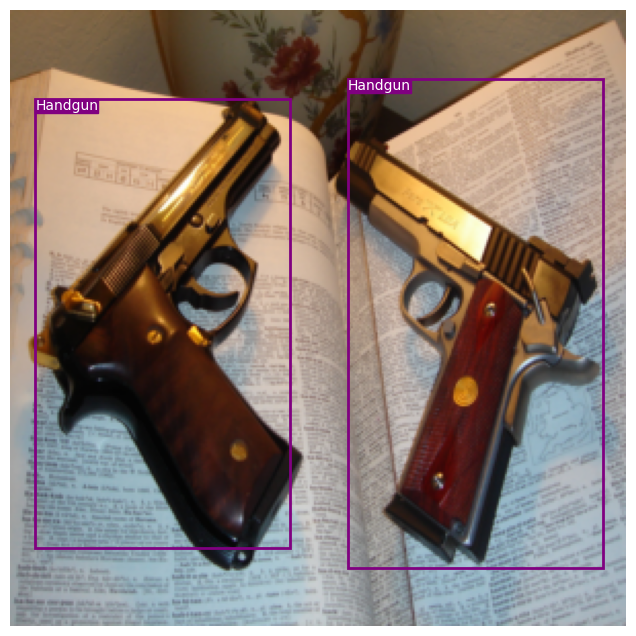

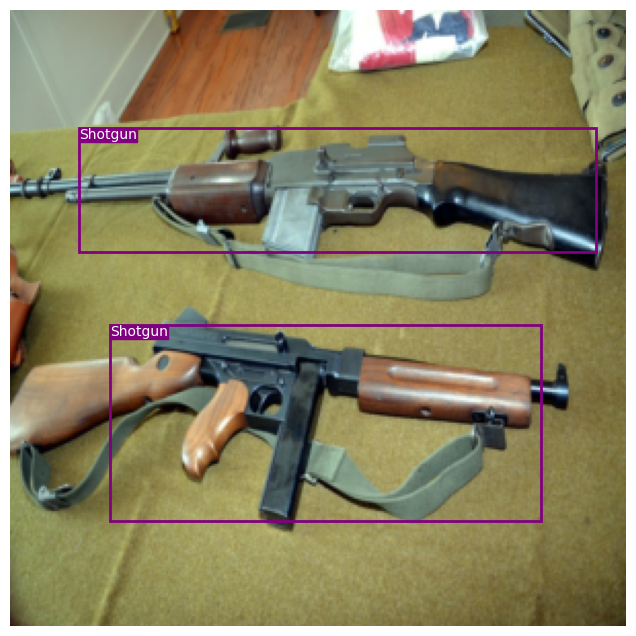

In [240]:
from PIL import Image
import numpy as np
import onnxruntime as ort
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Defining class names
class_names = ["Handgun", "Shotgun"]

# Load the ONNX model using ONNX Runtime
ort_session = ort.InferenceSession("models/mb1-ssd.onnx")

# Load imgages
image_paths = ['/content/pytorch-ssd/data/open_images/test/1f295c5fa8cb5741.jpg',
               '/content/pytorch-ssd/data/open_images/test/49e40ccefbef1c86.jpg']

for image_path in image_paths:
    # Preprocess images with fuction from 3.7
    norm_img_data, original_img = preprocess_image(image_path)

    # Inference
    ort_inputs = {ort_session.get_inputs()[0].name: norm_img_data}
    ort_outs = ort_session.run(None, ort_inputs)

    # Extract bounding boxes, labels, scores
    labels_scores = ort_outs[0][0]   # Labels and scores
    bboxes = ort_outs[1][0]          # Bounding boxes

    # Assuming the first index is label and the second index is score
    labels = labels_scores[:, 0]
    scores = labels_scores[:, 1]

    # Now, collect all detections before NMS
    all_boxes = []
    all_scores = []
    all_labels = []

    # Assuming the original image size is the one used for detection
    original_img_width, original_img_height = original_img.size

    # Collect all boxes, scores, and labels
    for box, label, score in zip(bboxes, labels, scores):
        if score > 0.05:  # Use a very low threshold to collect all potential detections
            all_boxes.append(box)
            all_scores.append(score)
            all_labels.append(label)

    # Apply Non-Maximum Suppression to filter detections
    selected_indices = non_max_suppression(all_boxes, all_scores, threshold=0.3)

    # Plot the image
    plt.figure(figsize=(8, 8))
    plt.imshow(original_img)
    ax = plt.gca()

    # Loop through the detections after NMS
    for idx in selected_indices:
        box = all_boxes[idx]
        label = all_labels[idx]
        score = all_scores[idx]

        # Scale the bounding box back to the original image size
        xmin, ymin, xmax, ymax = box
        xmin *= original_img_width
        xmax *= original_img_width
        ymin *= original_img_height
        ymax *= original_img_height

        # Calculate width and height of the box
        box_width = xmax - xmin
        box_height = ymax - ymin

        # Create the rectangle for the bounding box
        bbox = patches.Rectangle((xmin, ymin), box_width, box_height, linewidth=2, edgecolor='purple', facecolor='none')
        ax.add_patch(bbox)

        # Add a label with the class name
        label_text = f"{class_names[round(label)]}"
        plt.text(xmin, ymin, label_text, color='white', verticalalignment='top', bbox={'color': 'purple', 'pad': 0})

    plt.axis('off')
    plt.show()

**Answer:**

In above code we have used the inference made in previous part to annotate the images with bounding boxes and corresponding labels. We have used NMS to make sure we are only presenting the most relevant boxes rather than all overlapping bounding boxes. We can see that even though our per class accuracy was not as high as we would want it (especialy for shotguns) the model has very precisely detected correct gun category in our 2 (randomly picked) images.